In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')

c:\Users\Latte\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("autodata.csv")

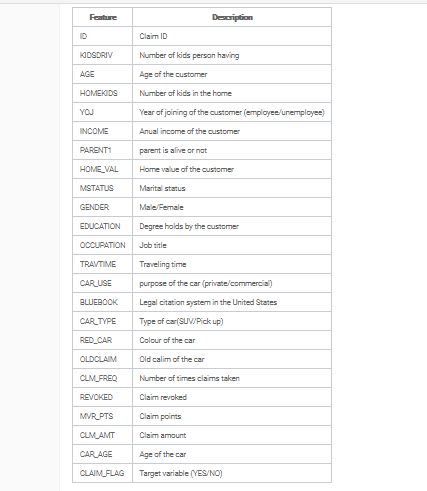

In [3]:
url = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2566208%2F50dd4f899017ad7c6ba848cfa513a853%2FScreenshot_2020-04-17%20GreyAtom%20-%20Learning%20Platform(1).png?generation=1587141048165615&alt=media"

response = requests.get(url)
img = Image.open(BytesIO(response.content))

img

In [4]:
df.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,1,Minivan,yes,$0,0,No,0,$0,1.0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,1,Van,yes,$0,0,No,2,$0,10.0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0
4,450221861,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,...,7,Minivan,yes,$0,0,No,0,$0,6.0,0


In [5]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [ ]:
### Pandas Profiling ile basic analiz yapıyoruz.
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='pp1.html')


In [6]:
### Sayısal olmasına rağmen içinde "$" , "," vb. geçen değişkenlere feature engineering yapıyoruz.

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

In [7]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


In [77]:
df = df.drop(["ID"],axis=1)

In [78]:
X = df.drop(["CLAIM_FLAG"],axis=1)
y = df.CLAIM_FLAG

In [79]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43, stratify=df.CLAIM_FLAG)

In [80]:
p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset freq mean : {p1:.2%}")
print(f"Test dataset freq mean : {p2:.2%}")

Train dataset freq mean : 26.66%
Test dataset freq mean : 26.64%


In [81]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)


In [82]:
# Create a list of models
models = [xgb.XGBClassifier()]

# Create a function to fit and score models
def fit_and_score(X_train, y_train):
    
    # Dictionary to store results
    results = {}
    
    # Loop through models
    for model in models:
        # Create cross-validation object
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
  
        # Store results
        results[str(model).split('(')[0]] = cv
  
        
    return results

# Store results in a dataframe
df_cv2 = pd.DataFrame(fit_and_score(X_train_encoded, y_train))


In [83]:
df_cv2

,XGBClassifier
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [84]:
### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_encoded,y_train)

X_test = target_encoder.transform(X_test)
X_test

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
1054,0,37.0,1,9.0,67175.0,0.454374,0.0,0.334652,0.275800,0.166441,...,23340.0,9,0.313210,0.268786,0.0,0,0.240648,5,0.0,22.0
4364,0,61.0,0,11.0,24049.0,0.238785,0.0,0.334652,0.255851,0.346598,...,10000.0,1,0.345679,0.261128,0.0,0,0.240648,0,0.0,7.0
4503,0,51.0,1,0.0,0.0,0.238785,0.0,0.221437,0.275800,0.346598,...,11800.0,7,0.290591,0.268786,0.0,0,0.240648,0,0.0,11.0
10226,0,50.0,0,11.0,127468.0,0.238785,304399.0,0.221437,0.275800,0.166441,...,6500.0,4,0.290591,0.268786,0.0,0,0.240648,2,0.0,10.0
409,0,44.0,0,12.0,39852.0,0.238785,125283.0,0.221437,0.275800,0.346598,...,7410.0,1,0.290591,0.268786,3704.0,2,0.240648,0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,33.0,2,9.0,31675.0,0.238785,159621.0,0.221437,0.275800,0.346598,...,9130.0,7,0.345679,0.268786,32882.0,1,0.449658,6,7719.0,1.0
1265,0,40.0,0,0.0,0.0,0.238785,55761.0,0.334652,0.275800,0.196633,...,17840.0,1,0.290591,0.268786,0.0,0,0.240648,3,0.0,18.0
2674,1,39.0,2,12.0,61612.0,0.238785,219629.0,0.221437,0.275800,0.346598,...,24780.0,4,0.313210,0.268786,0.0,0,0.240648,0,0.0,1.0
4292,0,45.0,2,13.0,39163.0,0.238785,168058.0,0.221437,0.275800,0.346598,...,9920.0,4,0.290591,0.268786,36025.0,3,0.240648,7,0.0,4.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00       549

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



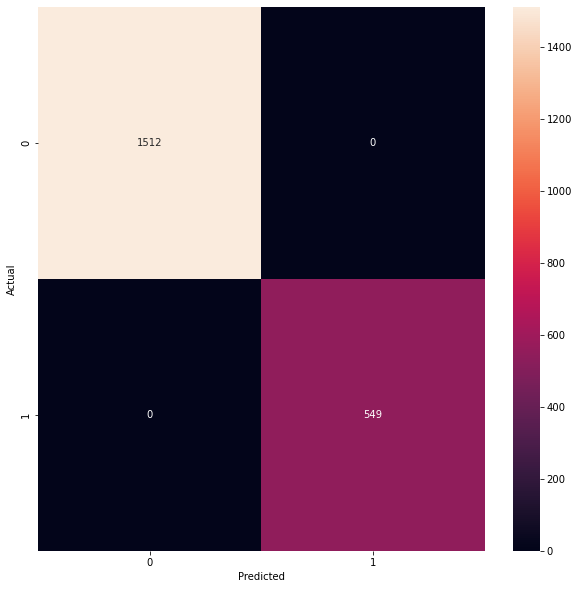

In [85]:
pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

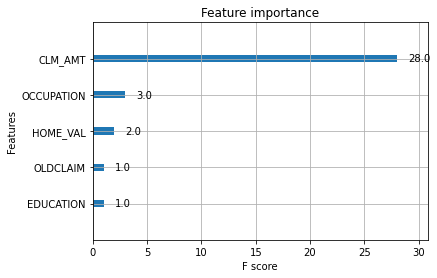

In [86]:
plot_importance(xgb_cl)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1512
           1       0.54      0.14      0.23       549

    accuracy                           0.74      2061
   macro avg       0.65      0.55      0.54      2061
weighted avg       0.70      0.74      0.68      2061



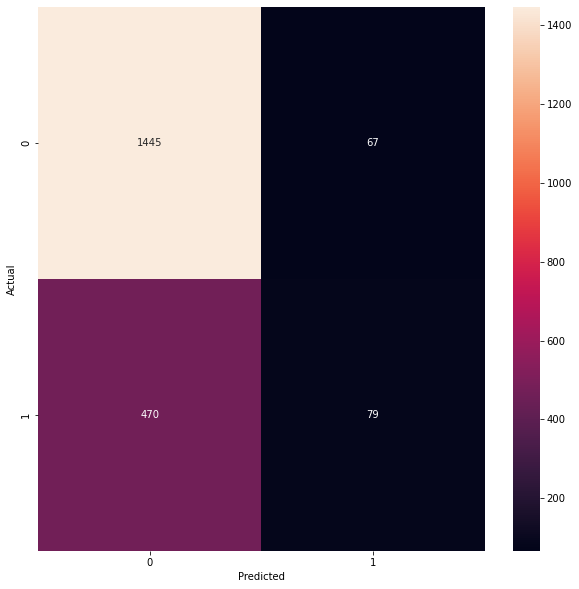

In [87]:
### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBClassifier()
X_train_encoded2 = X_train_encoded.drop(["CLM_AMT"],axis=1)
xgb_cl.fit(X_train_encoded2,y_train)

X_test = target_encoder.transform(X_test)
X_test2 = X_test.drop(["CLM_AMT"],axis=1)

pred = xgb_cl.predict(X_test2)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_encoded2, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test2)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred)
    return f1score

In [89]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-28 17:11:54,621] A new study created in memory with name: no-name-54efe388-c48a-4eb6-b244-884f4ee0c9bf
[I 2023-04-28 17:11:55,449] Trial 0 finished with value: 0.13823529411764707 and parameters: {'max_depth': 6, 'learning_rate': 0.25462387250413215, 'n_estimators': 210, 'min_child_weight': 5, 'gamma': 0.01747601664912243, 'subsample': 0.02995054624213067, 'colsample_bytree': 0.5872802980504558, 'reg_alpha': 1.9896535738801403e-06, 'reg_lambda': 0.17109190502782462}. Best is trial 0 with value: 0.13823529411764707.
[I 2023-04-28 17:11:56,696] Trial 1 finished with value: 0.03558718861209964 and parameters: {'max_depth': 5, 'learning_rate': 0.02419661794074967, 'n_estimators': 361, 'min_child_weight': 8, 'gamma': 0.05061971840913548, 'subsample': 0.0332528978493478, 'colsample_bytree': 0.19451462550624213, 'reg_alpha': 0.3814994570024529, 'reg_lambda': 0.004008048964369939}. Best is trial 0 with value: 0.13823529411764707.
[I 2023-04-28 17:11:58,100] Trial 2 finished with val

Number of finished trials: 20
Best trial:
  Value: 0.2708333333333333
  Params: 
    max_depth: 6
    learning_rate: 0.4581528374996749
    n_estimators: 365
    min_child_weight: 6
    gamma: 1.4088797619902536e-05
    subsample: 0.7542808085816984
    colsample_bytree: 0.1054573915253655
    reg_alpha: 0.0005629787672667912
    reg_lambda: 7.882997629633055e-08


In [90]:
params = trial.params
model = xgb.XGBClassifier(**params)
model.fit(X_train_encoded2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.1054573915253655, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=1.4088797619902536e-05, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4581528374996749, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=365, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.0005629787672667912,
              reg_lambda=7.882997629633055e-08, ...)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1512
           1       0.47      0.19      0.27       549

    accuracy                           0.73      2061
   macro avg       0.62      0.56      0.55      2061
weighted avg       0.68      0.73      0.68      2061



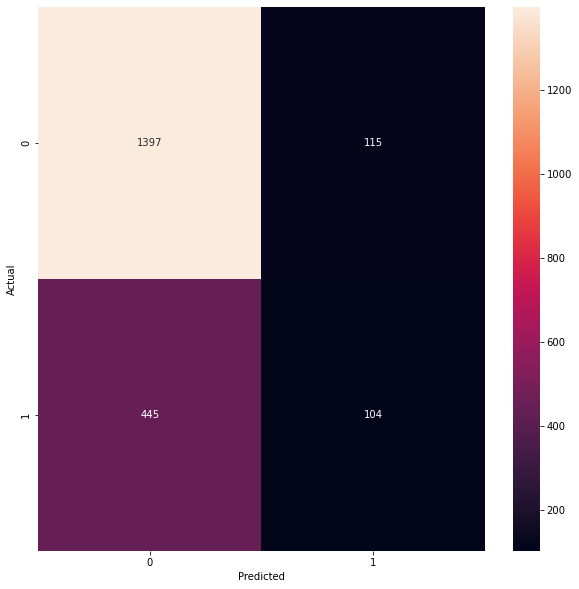

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

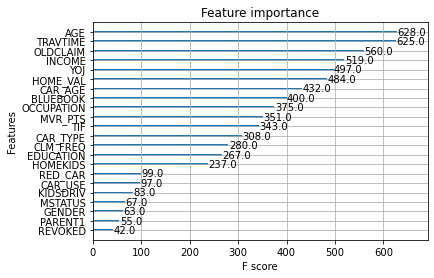

In [91]:
pred = model.predict(X_test2)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plot_importance(model)

              precision    recall  f1-score   support

           0       0.62      0.33      0.43      1512
           1       0.19      0.43      0.26       549

    accuracy                           0.36      2061
   macro avg       0.40      0.38      0.35      2061
weighted avg       0.50      0.36      0.39      2061



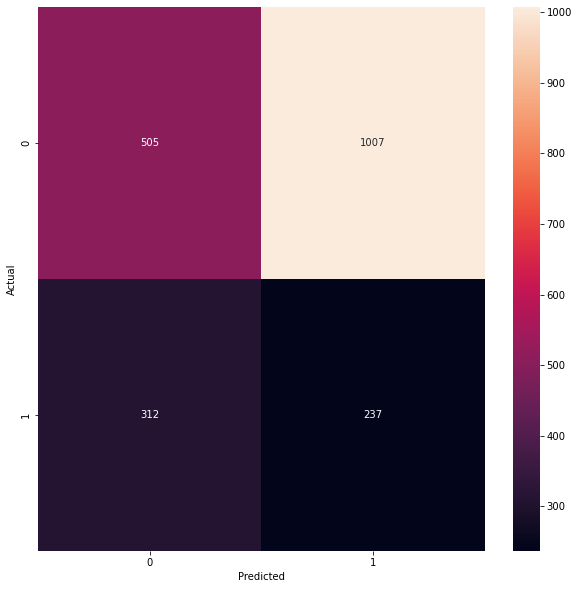

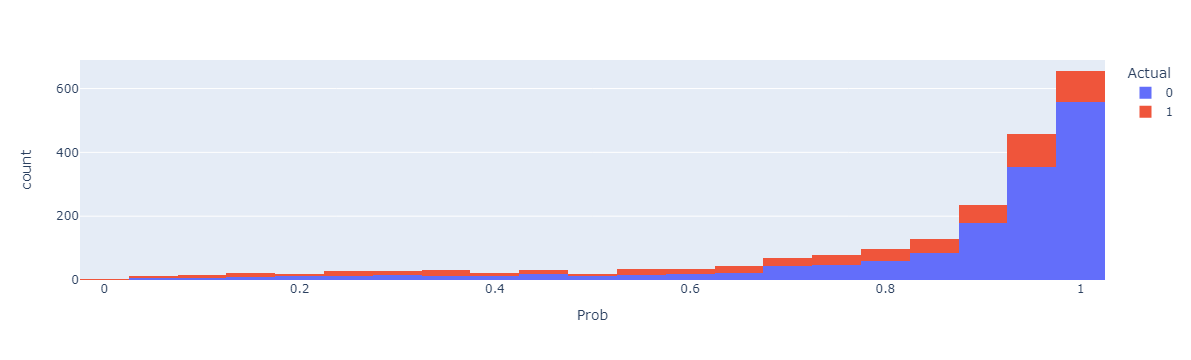

In [92]:
y_pred = model.predict_proba(X_test2)
lst = []
lst_prob = []
prob = 0.9
for i in range(len(y_pred)):
    if y_pred[i][0] > prob:
            lst.append(1)
            lst_prob.append(y_pred[i][0])
    else:
        lst.append(0)
        lst_prob.append(y_pred[i][0])
        
conf_mat = confusion_matrix(y_test, lst)
print(metrics.classification_report(y_test,lst))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : lst,
                          "Prob" : lst_prob})

fig = px.histogram(prob_data, x="Prob", color="Actual")
fig.show()



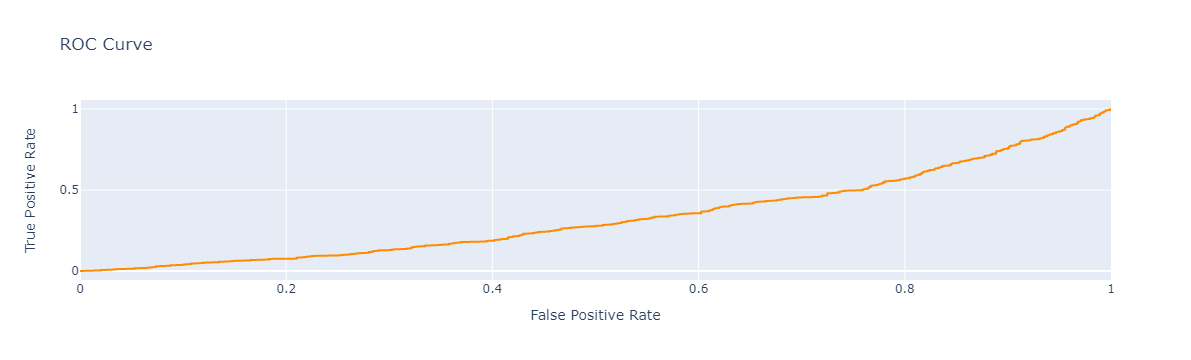

In [93]:
# ROC Curve oluşturma
fpr, tpr, thresholds = roc_curve(y_test, lst_prob)

# Plotly ile ROC Curve oluşturma
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr,
                    mode='lines',
                    line=dict(color='darkorange', width=2)))
fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  showlegend=False)
fig.show()

In [94]:
###############################

In [95]:
df2 =  pd.read_csv("autodata.csv")

In [96]:
df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                       "KIDSDRIV":"count"}).reset_index()
df3["FRQ"] = df3.CLAIM_FLAG / df3.KIDSDRIV
df3 = df3[["ID","FRQ"]].sort_values(by= "FRQ",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


In [97]:
### Sayısal olmasına rağmen içinde "$" , "," vb. geçen değişkenlere feature engineering yapıyoruz.
df = df5.copy()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

In [98]:
X = df.drop(["FRQ"],axis=1)
y = df.FRQ

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43, stratify=df.FRQ)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset freq mean : {p1:.2%}")
print(f"Test dataset freq mean : {p2:.2%}")

Train dataset freq mean : 26.66%
Test dataset freq mean : 26.64%


In [99]:
X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)


In [100]:
### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(X_train_encoded,y_train)

X_test = target_encoder.transform(X_test)
pred = xgb_cl.predict(X_test)

In [101]:
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Oralama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")


Ortalama Başarı : 1.008225434130499
Hasarlıların Oralama Tahmini : 43.36%
Hasarsızların Ortalama Tahmini : 19.98%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

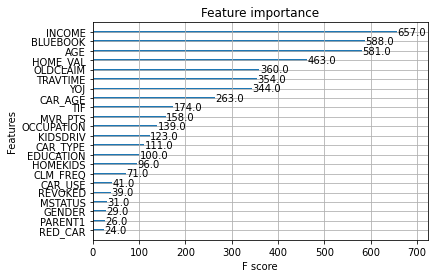

In [102]:
plot_importance(xgb_cl)

In [103]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'count:poisson',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

In [104]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-28 17:12:26,568] A new study created in memory with name: no-name-d8143e85-1f14-4336-b2eb-05cfb60d30b2
[I 2023-04-28 17:12:27,779] Trial 0 finished with value: -0.048492386919855246 and parameters: {'max_depth': 6, 'learning_rate': 0.15633546690169886, 'n_estimators': 278, 'min_child_weight': 8, 'gamma': 8.471118265643929e-06, 'subsample': 0.04300605877720633, 'colsample_bytree': 0.1613597072232855, 'reg_alpha': 0.0644067717189977, 'reg_lambda': 8.623179954269888e-05}. Best is trial 0 with value: -0.048492386919855246.
[I 2023-04-28 17:12:30,522] Trial 1 finished with value: 0.011696223608306466 and parameters: {'max_depth': 8, 'learning_rate': 0.11729235014818636, 'n_estimators': 374, 'min_child_weight': 7, 'gamma': 0.4723716017768127, 'subsample': 0.09031790598935106, 'colsample_bytree': 0.8831760977335649, 'reg_alpha': 0.718001568616259, 'reg_lambda': 1.6959952220715082e-07}. Best is trial 1 with value: 0.011696223608306466.
[I 2023-04-28 17:12:32,530] Trial 2 finished wi

Number of finished trials: 20
Best trial:
  Value: 0.1841481403127334
  Params: 
    max_depth: 9
    learning_rate: 0.040555538725862594
    n_estimators: 484
    min_child_weight: 1
    gamma: 0.008745310288431288
    subsample: 0.3274138973332791
    colsample_bytree: 0.2432340045053664
    reg_alpha: 5.4383540323533275e-05
    reg_lambda: 0.009935032355171876


In [107]:
params = trial.params
model_frq = xgb.XGBRegressor(**params)
model_frq.fit(X_train_encoded, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.2432340045053664, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.008745310288431288, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.040555538725862594, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=484, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=5.4383540323533275e-05,
             reg_lambda=0.009935032355171876, ...)

Ortalama Başarı : 0.9868848497859654
Hasarlıların Oralama Tahmini : 42.98%
Hasarsızların Ortalama Tahmini : 21.03%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

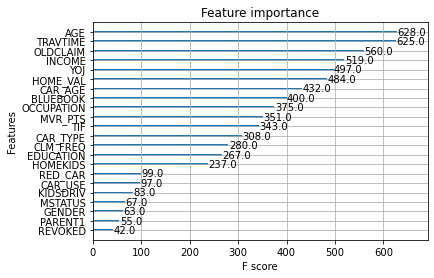

In [108]:
pred = model_frq.predict(X_test)
df_v = pd.DataFrame({"Actual" : y_test,
                     "Pred" : pred})

print(f"Ortalama Başarı : {y_test.mean() / pred.mean()}")
print(f"Hasarlıların Oralama Tahmini : {df_v[df_v.Actual == 1].Pred.mean():.2%}")
print(f"Hasarsızların Ortalama Tahmini : {df_v[df_v.Actual == 0].Pred.mean():.2%}")
plot_importance(model)

In [38]:
###########

In [122]:
df2 =  pd.read_csv("autodata.csv")

df2 = df2[df2.CLAIM_FLAG == 1]
df = df2.copy()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].str.replace('$' , '')
        df[i] = df[i].str.replace(',' , '')
        try:
            df[i] = df[i].astype(float)
        except:
            pass

df2 = df.copy()

df3 = df2.groupby("ID").agg({"CLAIM_FLAG":"sum",
                             "CLM_AMT" : "sum"}).reset_index()
df3["SEVERITY"] = df3.CLM_AMT / df3.CLAIM_FLAG
df3 = df3[["ID","SEVERITY"]].sort_values(by= "SEVERITY",ascending=False)
df4 = df2.merge(df3,how="left",on="ID")
df5 = df4.drop(["ID","CLM_AMT","CLAIM_FLAG"],axis=1)


df5


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,SEVERITY
0,0,34.0,1,12.0,125301.0,Yes,0.0,z_No,z_F,Bachelors,...,17430.0,1,Sports Car,no,0.0,0,No,0,7.0,2946.0
1,1,40.0,1,11.0,50815.0,Yes,0.0,z_No,M,z_High School,...,18930.0,6,Minivan,no,3295.0,1,No,2,1.0,6477.0
2,1,37.0,2,NaN,107961.0,No,333680.0,Yes,M,Bachelors,...,16970.0,1,Van,yes,2374.0,1,Yes,10,7.0,8915.5
3,0,34.0,0,10.0,62978.0,No,0.0,z_No,z_F,Bachelors,...,11200.0,1,z_SUV,no,0.0,0,No,0,1.0,2501.0
4,0,53.0,0,14.0,77100.0,No,0.0,z_No,z_F,Masters,...,18300.0,1,Sports Car,no,0.0,0,No,0,11.0,6077.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0,43.0,0,NaN,0.0,No,55203.0,Yes,z_F,PhD,...,24030.0,9,Minivan,no,3035.0,4,No,0,14.0,471.0
2742,0,46.0,0,10.0,68360.0,No,237457.0,z_No,M,Bachelors,...,12940.0,1,Minivan,no,6560.0,3,No,7,11.0,3135.0
2743,0,41.0,0,12.0,92185.0,No,289370.0,Yes,M,z_High School,...,1500.0,11,Minivan,yes,0.0,0,No,0,10.0,1815.0
2744,0,45.0,0,11.0,52966.0,No,0.0,z_No,M,z_High School,...,11300.0,6,Pickup,yes,16239.0,2,Yes,5,1.0,2967.0


Fitting 10 distributions:   0%|          | 0/10 [00:00<?, ?it/s]2023-04-29 15:51:54,902 | INFO | fitter.py:335 | _fit_single_distribution | Fitted expon distribution with error=2.8093103022526218e-08)
2023-04-29 15:51:54,932 | INFO | fitter.py:335 | _fit_single_distribution | Fitted norm distribution with error=4.5525176203309496e-08)
2023-04-29 15:51:54,974 | INFO | fitter.py:335 | _fit_single_distribution | Fitted uniform distribution with error=9.0161465251129e-08)
Fitting 10 distributions:  30%|███       | 3/10 [00:00<00:00, 23.52it/s]2023-04-29 15:51:55,004 | INFO | fitter.py:335 | _fit_single_distribution | Fitted rayleigh distribution with error=3.4392481489657894e-08)
2023-04-29 15:51:55,301 | INFO | fitter.py:335 | _fit_single_distribution | Fitted cauchy distribution with error=6.018887844950477e-09)
2023-04-29 15:51:56,271 | INFO | fitter.py:335 | _fit_single_distribution | Fitted lognorm distribution with error=7.45874870112529e-09)
Fitting 10 distributions:  60%|██████    

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,6.018888e-09,3029.358016,-73704.004935,inf,0.115771,1.607739e-32
lognorm,7.458749e-09,3505.847678,-73107.110767,inf,0.092207,9.089776e-21
gamma,1.630823e-08,7660.826284,-70958.964616,inf,0.183470,2.265595e-81
chi2,2.352040e-08,7349.357544,-69953.383382,inf,0.204729,2.117488e-101
expon,2.809310e-08,3926.067551,-69473.458013,inf,0.146642,5.305713e-52


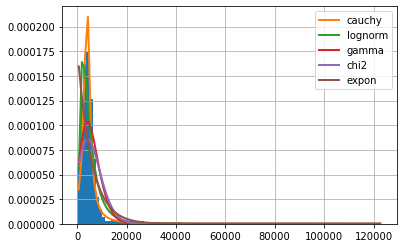

In [123]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df5.SEVERITY,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [111]:
### Sayısal olmasına rağmen içinde "$" , "," vb. geçen değişkenlere feature engineering yapıyoruz.
df = df5.copy()

X = df.drop(["SEVERITY"],axis=1)
y = df.SEVERITY

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 43)

p1 = sum(y_train) / len(y_train)
p2 = sum(y_test) / len(y_test)
print(f"Train dataset SEVERITY mean : {p1}")
print(f"Test dataset SEVERITY mean : {p2}")

X_train_target_encoded = X_train.copy()
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train_target_encoded, y_train)

### BOOSTING MODELIYLE DEVAM EDELIM

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(X_train_encoded,y_train)

X_test = target_encoder.transform(X_test)
pred = xgb_cl.predict(X_test)

Train dataset SEVERITY mean : 5698.605646630236
Test dataset SEVERITY mean : 5554.416363636364


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

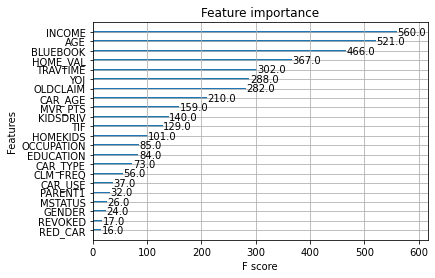

In [112]:
plot_importance(xgb_cl)

In [113]:
def objective(trial):
    """Define the objective function"""

    params = {'objective' : 'reg:gamma',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    eval_metric_score = y_test.mean() / y_pred.mean() -1   
    return eval_metric_score

In [114]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-04-28 17:14:43,237] A new study created in memory with name: no-name-bd5badf2-ce5a-41cb-aa01-7987319686c9
[I 2023-04-28 17:14:43,910] Trial 0 finished with value: 0.0006703756785180204 and parameters: {'max_depth': 1, 'learning_rate': 0.19948781846589933, 'n_estimators': 292, 'min_child_weight': 9, 'gamma': 4.071114851811637e-05, 'subsample': 0.08529858046576438, 'colsample_bytree': 0.29483993835139133, 'reg_alpha': 0.7493204405161505, 'reg_lambda': 3.3734193272572524e-08}. Best is trial 0 with value: 0.0006703756785180204.
[I 2023-04-28 17:14:44,348] Trial 1 finished with value: 0.04909341239612641 and parameters: {'max_depth': 8, 'learning_rate': 0.32030762257778117, 'n_estimators': 135, 'min_child_weight': 3, 'gamma': 1.2547589488871538e-08, 'subsample': 0.29386811463562784, 'colsample_bytree': 0.017969858003053837, 'reg_alpha': 0.215671326344433, 'reg_lambda': 0.0012137567830173735}. Best is trial 1 with value: 0.04909341239612641.
[I 2023-04-28 17:14:45,711] Trial 2 finish

Number of finished trials: 20
Best trial:
  Value: 6735.295591895062
  Params: 
    max_depth: 5
    learning_rate: 0.010005742726782323
    n_estimators: 50
    min_child_weight: 7
    gamma: 4.6338008006793256e-07
    subsample: 0.2929153415214889
    colsample_bytree: 0.04504776594429581
    reg_alpha: 1.0113311192334773e-08
    reg_lambda: 9.053258583177293e-07


In [115]:
params = trial.params
model_sev = xgb.XGBRegressor(**params)
model_sev.fit(X_train_encoded, y_train)
pred = model_sev.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

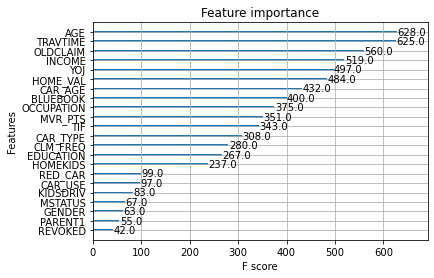

In [116]:
plot_importance(model)

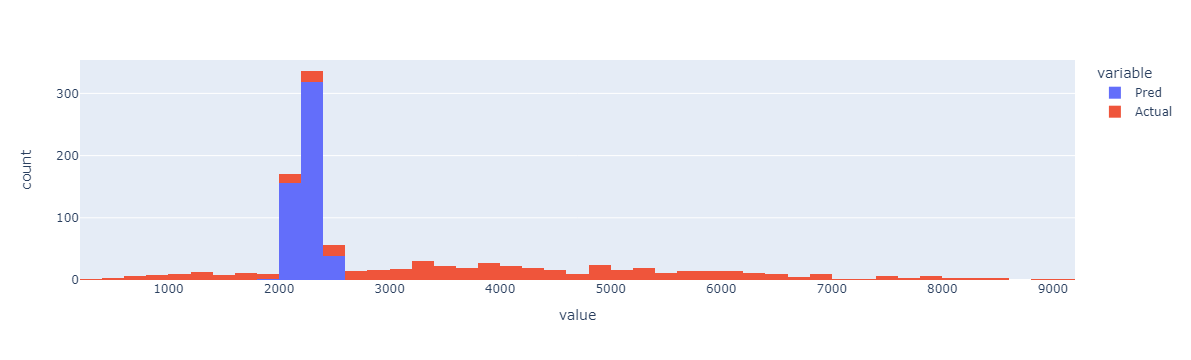

In [117]:
prob_data = pd.DataFrame({"Actual" : y_test,
                          "Pred" : pred})

prob_data2 = prob_data[prob_data.Actual < 10000]
fig = px.histogram(prob_data2, x=["Pred","Actual"])
fig.show()

In [121]:
pickle.dump(model_frq, open('FRQ_Model.sav','wb'))
pickle.dump(model_sev, open('SEV_Model.sav','wb'))
pickle.dump(target_encoder, open('Target_Encoder.sav','wb'))
